<a href="https://colab.research.google.com/github/krishnapriya333/Credit_Score_Classification/blob/main/Credit_Score_Classifiction_week2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**





You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts

**Exploratory Data Analysis**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/credit.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [9]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

**Data Preprocessing**

In [10]:
#Missing Values
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There are no missing values in the dataset

In [11]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
data = df.copy()

In [13]:
#dropping unneccessory columns
columns_to_drop = ['ID','Customer_ID','Month','Name','SSN','Type_of_Loan']

data.drop(columns=columns_to_drop, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

In [15]:
data.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [16]:
#Detecting object and numerical columns
ob_cols=data.select_dtypes(exclude=['number']).columns

In [17]:
ob_cols

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [18]:
num_cols=data.select_dtypes(include=['number']).columns

In [19]:
num_cols

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

**Outlier Detection and Removal**

In [20]:
df_c = data.copy()

In [21]:
def box_plot(df_c, num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
      plt.subplot(5,4, i+1)
      l = num_cols[i]
      sns.boxplot(df_c[l])

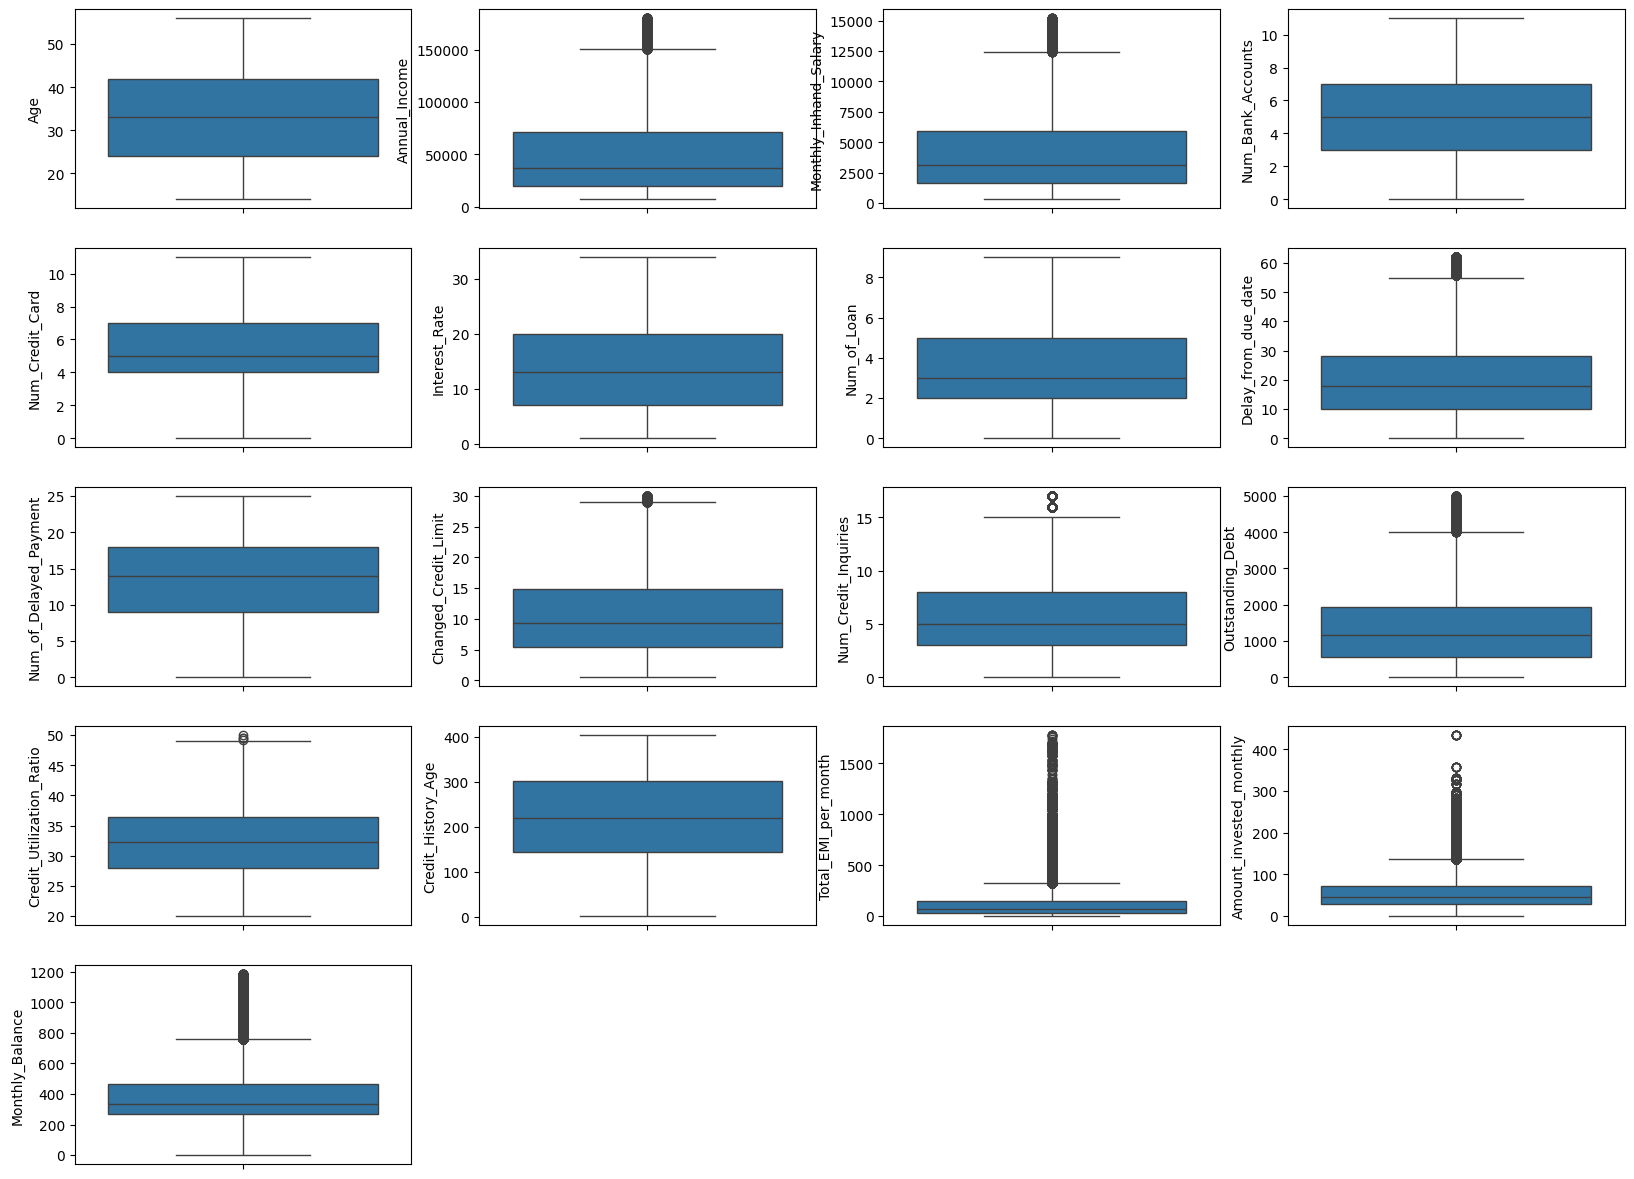

In [22]:
box_plot(df_c, num_cols)

In [23]:
df_c_n = df_c.copy()

In [24]:
def drop_outliers(df_c_n, num_cols):
  for i in num_cols:
    Q3 = np.percentile(df_c_n[i], 75)
    Q1 =  np.percentile(df_c_n[i], 25)
    IQR = Q3 - Q1
    df_c_n.drop(df_c_n[df_c_n[i]>=(1.5*IQR+Q3)].index,inplace = True)
    df_c_n.drop(df_c_n[df_c_n[i]<=(Q1-1.5*IQR)].index,inplace = True)
drop_outliers(df_c_n,num_cols)


In [25]:
drop_outliers(df_c_n, num_cols)

In [26]:
df_c_n.shape

(53415, 22)

In [27]:
def box_plot(df_c_n, num_cols):
    plt.figure(figsize=(20, 15))
    for i,column in enumerate((num_cols)):
      plt.subplot(5,4, i+1)
      l = num_cols[i]
      sns.boxplot(df_c_n[l])

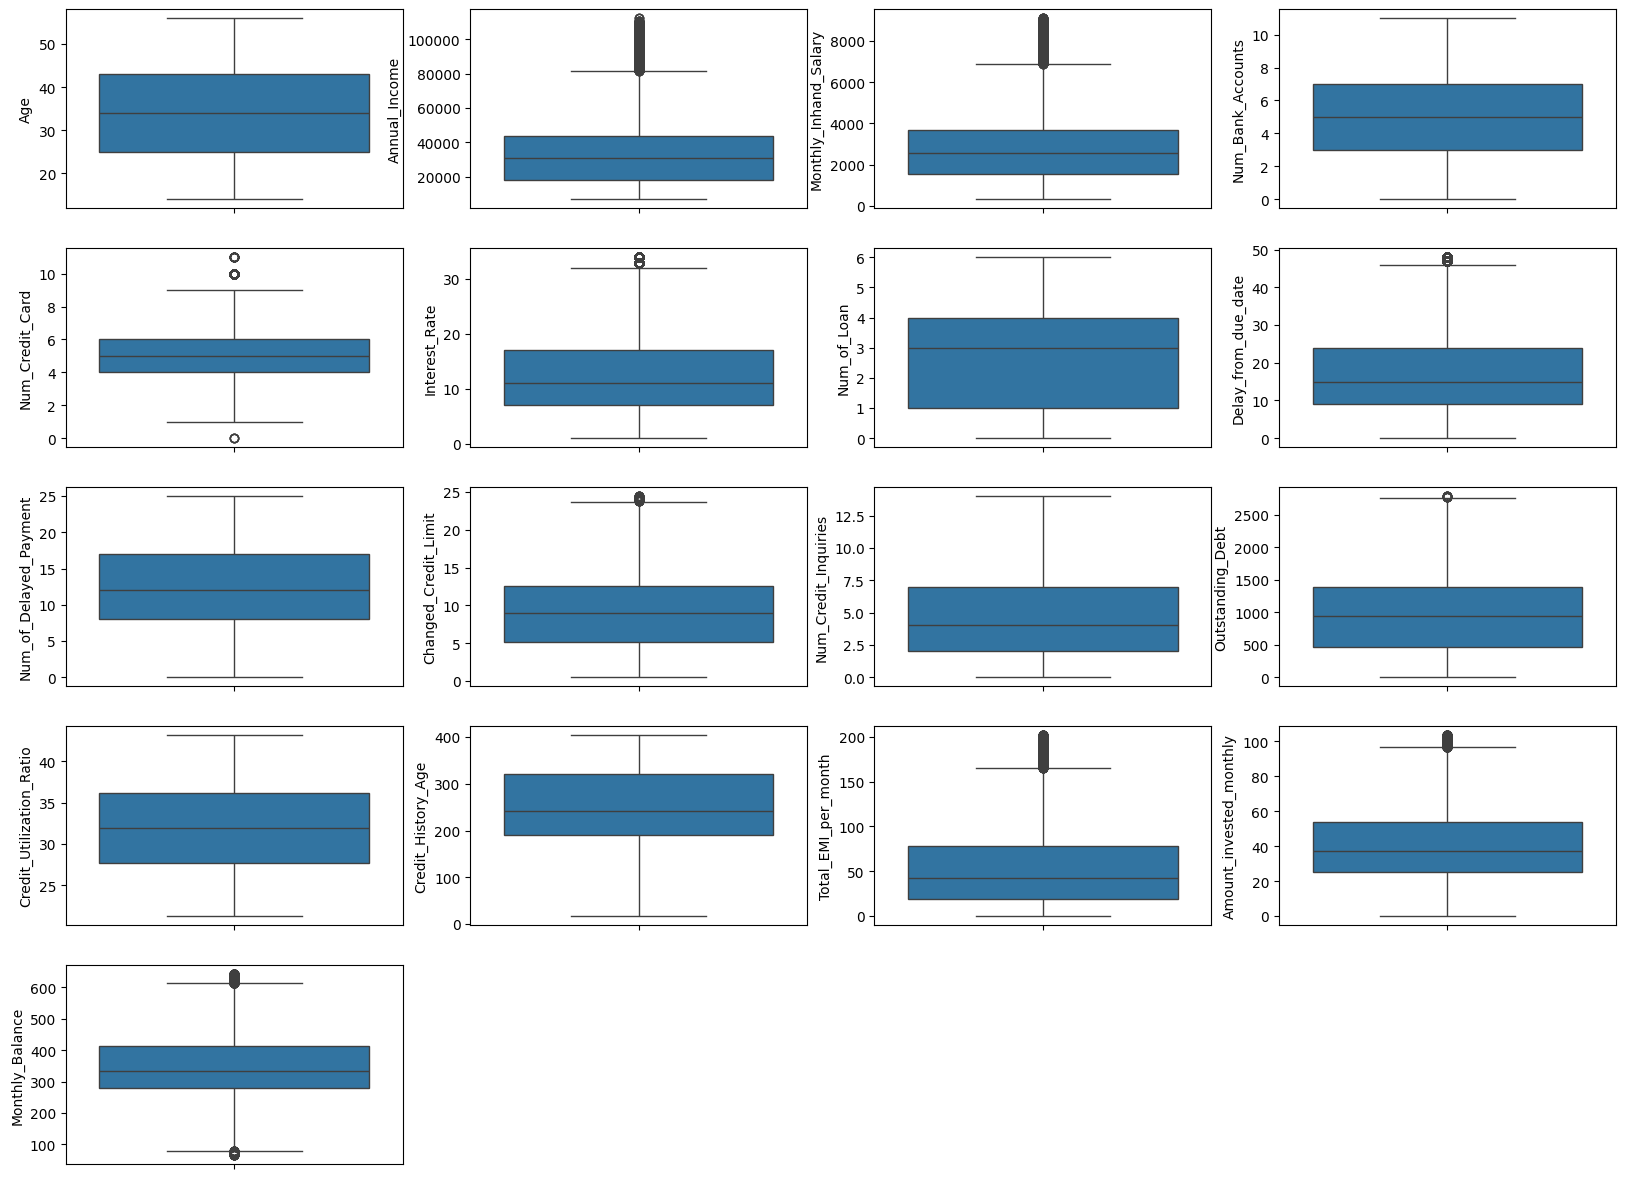

In [28]:
box_plot(df_c_n, num_cols)

**Encoding**

In [29]:
df_c_n['Credit_Mix'].value_counts()

Standard    30817
Good        18591
Bad          4007
Name: Credit_Mix, dtype: int64

In [30]:
df_c_n["Credit_Mix"] = df_c_n["Credit_Mix"].map({"Standard": 1,
                               "Good": 2,
                               "Bad": 0})


In [31]:
df_c_n['Credit_Score'].value_counts()

Standard    30455
Poor        12377
Good        10583
Name: Credit_Score, dtype: int64

In [32]:
df_c_n["Credit_Score"] = df_c_n["Credit_Score"].map({"Standard": 1,
                               "Good": 2,
                               "Poor": 0})


In [33]:
df_c_n = pd.get_dummies(df_c_n)

In [34]:
df_c_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53415 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 53415 non-null  float64
 1   Annual_Income                                       53415 non-null  float64
 2   Monthly_Inhand_Salary                               53415 non-null  float64
 3   Num_Bank_Accounts                                   53415 non-null  float64
 4   Num_Credit_Card                                     53415 non-null  float64
 5   Interest_Rate                                       53415 non-null  float64
 6   Num_of_Loan                                         53415 non-null  float64
 7   Delay_from_due_date                                 53415 non-null  float64
 8   Num_of_Delayed_Payment                              53415 non-null  float64


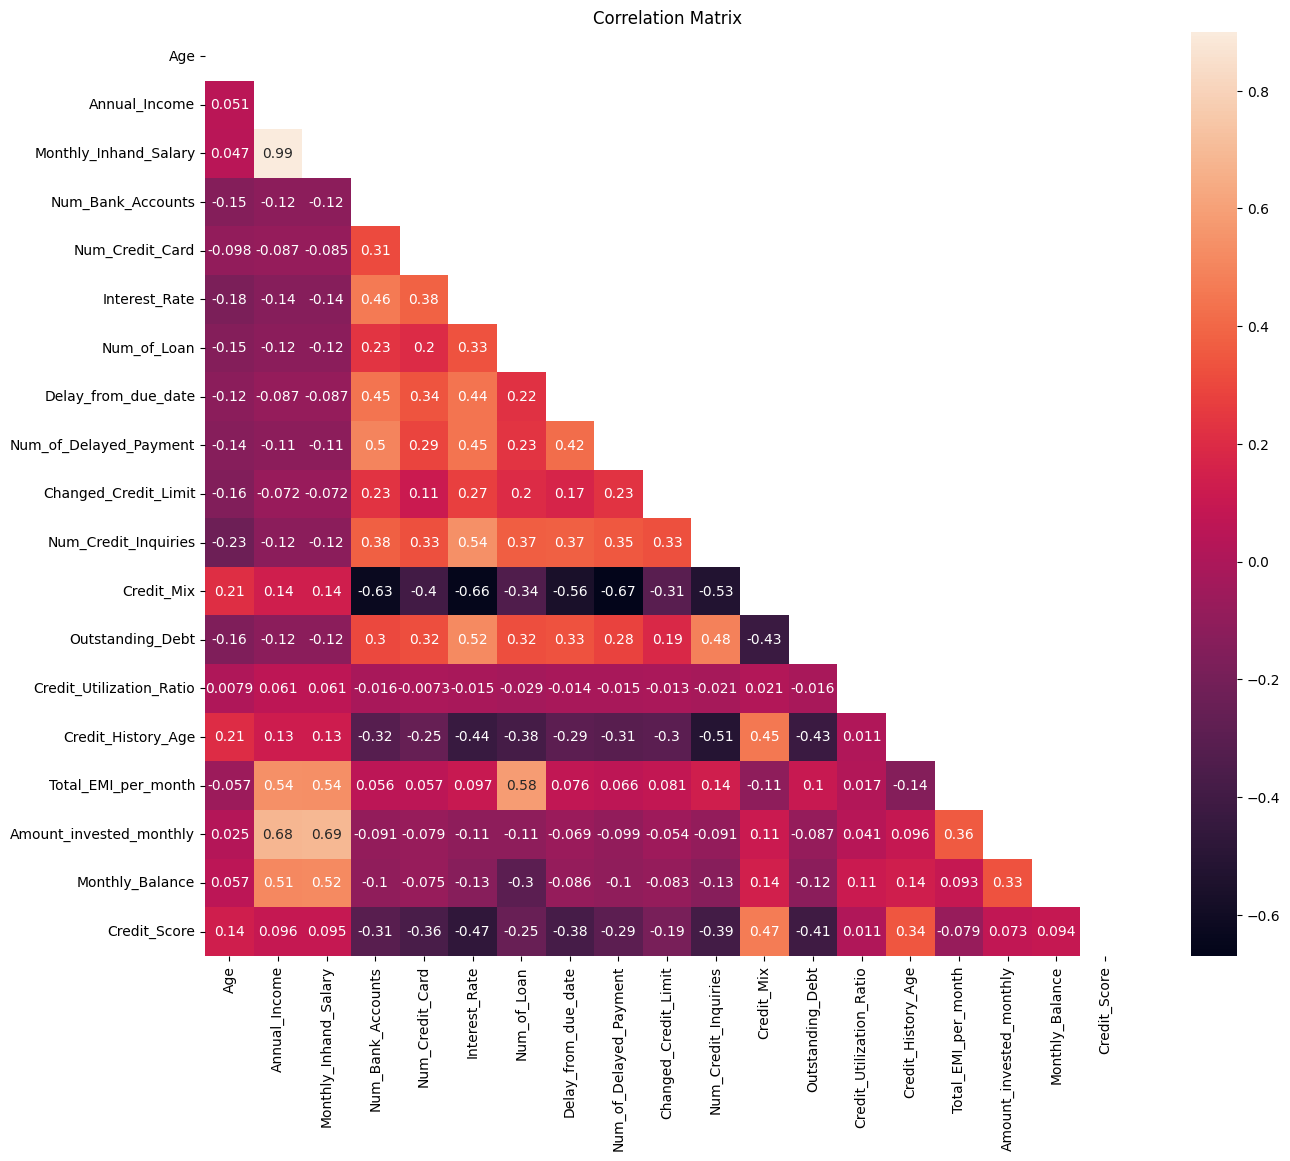

In [35]:
corr = df_c_n.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

From the Correlation Matrix we can see that credit_mix has strong correlation with credit_score compared to other features

Features like num_bank_accounts,num_credit_card,interest_rate,num_of_loan etc are negatively correlated.

**Data Splitting**

In [37]:
X = df_c_n.drop(columns=['Credit_Score'], axis=0, inplace=False)
y = df_c_n['Credit_Score']

**Training and Testing Data**

In [38]:
# Splitting data in Testing and Training Sets with 33% percent data being used for Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [39]:
X_train.shape

(35788, 42)

In [40]:
X_test.shape

(17627, 42)

In [41]:
y_train.shape

(35788,)

In [42]:
y_test.shape

(17627,)

**Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled

array([[ 0.25545008,  0.5765309 ,  0.59950534, ..., -0.3672411 ,
        -0.39763393,  1.42093817],
       [ 0.80368785, -0.26258718, -0.34508507, ..., -0.3672411 ,
        -0.39763393,  1.42093817],
       [-0.38416065,  0.46088491,  0.36116782, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       ...,
       [-0.65827954, -0.67698612, -0.72335096, ..., -0.3672411 ,
        -0.39763393,  1.42093817],
       [-0.7496525 ,  0.22373983,  0.17014611, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       [ 0.43819601, -0.59876076, -0.77191492, ...,  2.7230068 ,
        -0.39763393, -0.70376039]])

In [46]:
X_test_scaled

array([[-0.0186688 ,  0.47610689,  0.44380854, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       [ 0.07270416, -0.71089432, -0.73262503, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       [ 0.80368785,  2.0600899 ,  2.07314159, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       ...,
       [ 1.80879043, -0.03923181, -0.14496742, ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       [ 0.07270416, -0.90840096, -0.8223462 , ..., -0.3672411 ,
        -0.39763393, -0.70376039],
       [-0.93239842, -0.09436013,  0.04634007, ..., -0.3672411 ,
        -0.39763393,  1.42093817]])

**Modelling**

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
lr_pred = LR.predict(X_test_scaled)

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, lr_pred)

In [49]:
accuracy

0.7030691552731605

              precision    recall  f1-score   support

           0       0.71      0.51      0.59      4067
           1       0.76      0.79      0.77     10116
           2       0.56      0.69      0.62      3444

    accuracy                           0.70     17627
   macro avg       0.68      0.66      0.66     17627
weighted avg       0.71      0.70      0.70     17627



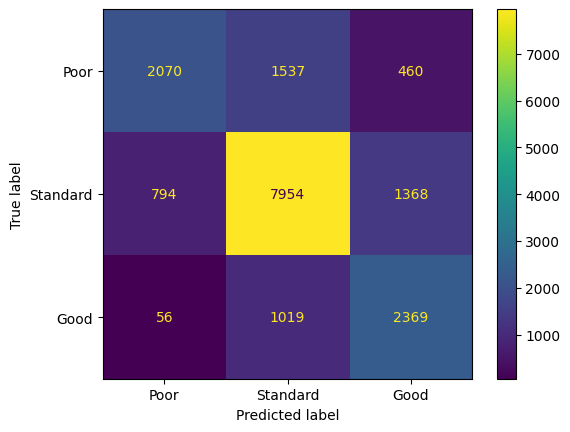

In [50]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, lr_pred)

print(classification_report(y_test,lr_pred))
result = confusion_matrix(y_test,lr_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Random Forest Classifier**

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4067
           1       0.86      0.84      0.85     10116
           2       0.78      0.79      0.79      3444

    accuracy                           0.83     17627
   macro avg       0.81      0.82      0.81     17627
weighted avg       0.83      0.83      0.83     17627



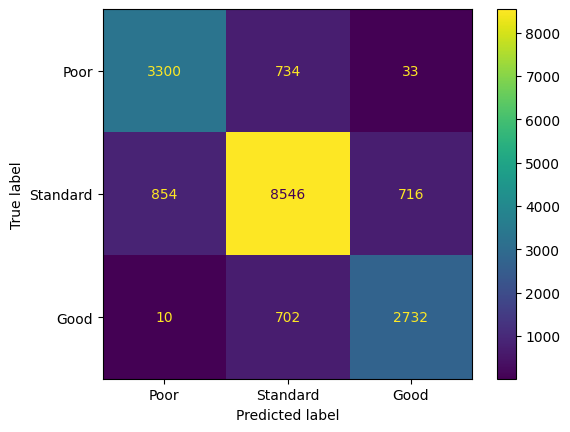

In [52]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, rfc_pred)

print(classification_report(y_test,rfc_pred))
result = confusion_matrix(y_test,rfc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

In [53]:
accuracy

0.8270267203721563

**Decision Tree Classifier**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
dtc= dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dtc_pred)
accuracy

0.709763431100017

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      4067
           1       0.85      0.71      0.77     10116
           2       0.51      0.76      0.61      3444

    accuracy                           0.71     17627
   macro avg       0.68      0.71      0.68     17627
weighted avg       0.74      0.71      0.72     17627



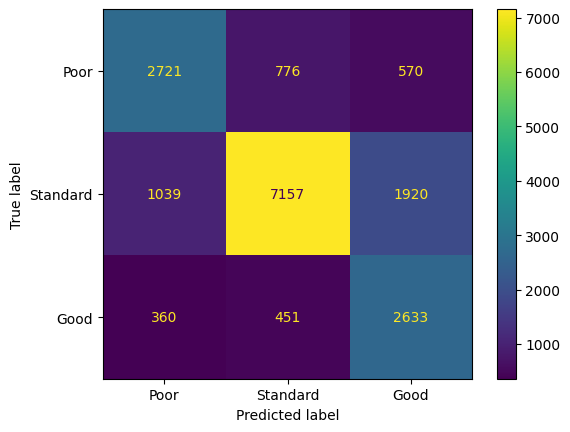

In [56]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, dtc_pred)

print(classification_report(y_test,dtc_pred))
result = confusion_matrix(y_test,dtc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Gradient Boosting**

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)
GBC_pred=GBC.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, GBC_pred)
accuracy

0.7478300334713791

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4067
           1       0.82      0.78      0.80     10116
           2       0.60      0.74      0.66      3444

    accuracy                           0.75     17627
   macro avg       0.72      0.73      0.72     17627
weighted avg       0.76      0.75      0.75     17627



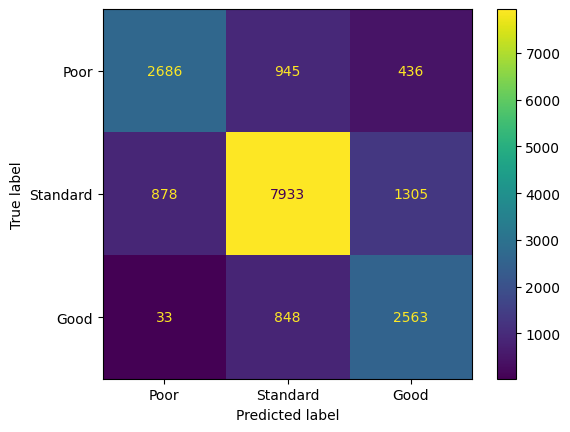

In [59]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, GBC_pred)

print(classification_report(y_test,GBC_pred))
result = confusion_matrix(y_test,GBC_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**Support Vector Machine**

In [60]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, svc_pred)
accuracy

0.6054915754240654

              precision    recall  f1-score   support

           0       0.68      0.25      0.37      4067
           1       0.60      0.95      0.74     10116
           2       0.00      0.00      0.00      3444

    accuracy                           0.61     17627
   macro avg       0.43      0.40      0.37     17627
weighted avg       0.50      0.61      0.51     17627



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


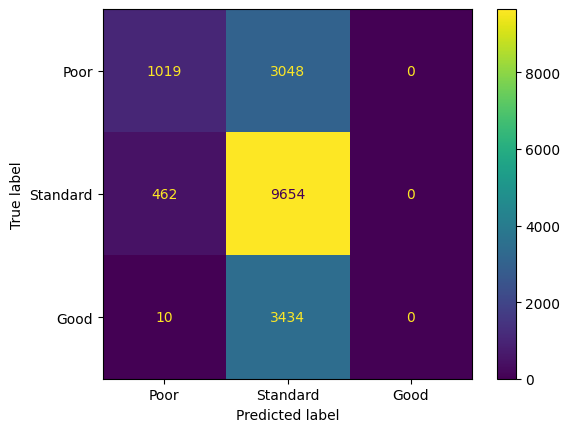

In [62]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, svc_pred)

print(classification_report(y_test,svc_pred))
result = confusion_matrix(y_test,svc_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**K Nearest Neighbour**

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)


In [64]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_pred)
accuracy

0.7831168094400636

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4067
           1       0.83      0.80      0.81     10116
           2       0.72      0.74      0.73      3444

    accuracy                           0.78     17627
   macro avg       0.76      0.77      0.77     17627
weighted avg       0.79      0.78      0.78     17627



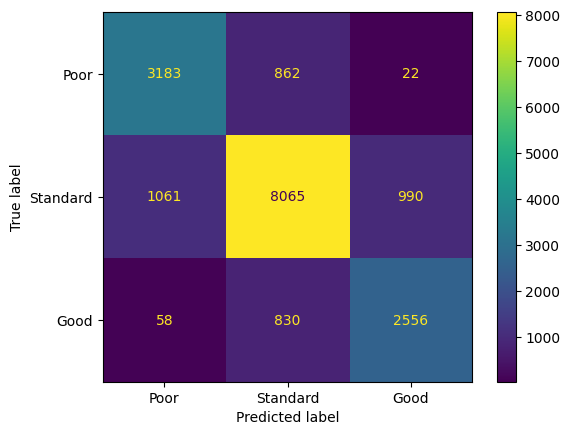

In [65]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, knn_pred)

print(classification_report(y_test,knn_pred))
result = confusion_matrix(y_test,knn_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

**XGB Classifier**

In [66]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, xgb_pred)
accuracy

0.8199353264877745

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      4067
           1       0.85      0.84      0.85     10116
           2       0.78      0.78      0.78      3444

    accuracy                           0.82     17627
   macro avg       0.80      0.81      0.81     17627
weighted avg       0.82      0.82      0.82     17627



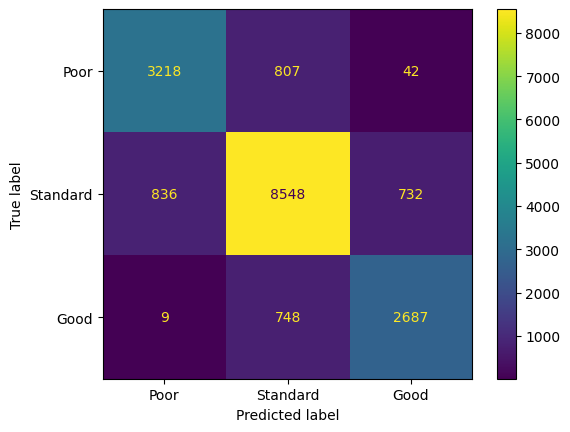

In [68]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
accuracy = accuracy_score(y_test, xgb_pred)

print(classification_report(y_test,xgb_pred))
result = confusion_matrix(y_test,xgb_pred)
cmd = ConfusionMatrixDisplay(result,display_labels=['Poor','Standard','Good'])
cmd.plot()

Random Forest has better accuracy compared to other models.

Next we will try other methods to increase accuracy.